YOUTUBE ADDVIEW PREDICTION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#importing data

In [4]:
data_train = pd.read_csv("train.csv")

In [5]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [6]:
data_train.shape

(14999, 9)

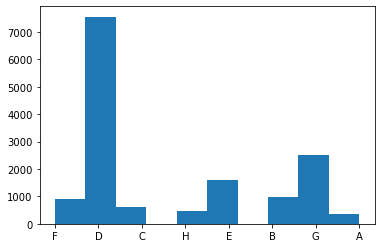

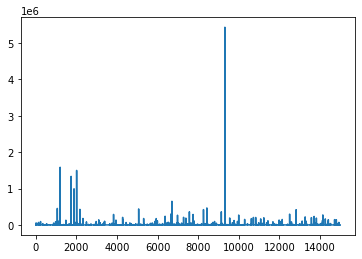

In [7]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()


In [8]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

C:\Users\SC1A7~1.BIS\AppData\Local\Temp/ipykernel_35652/1077671707.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


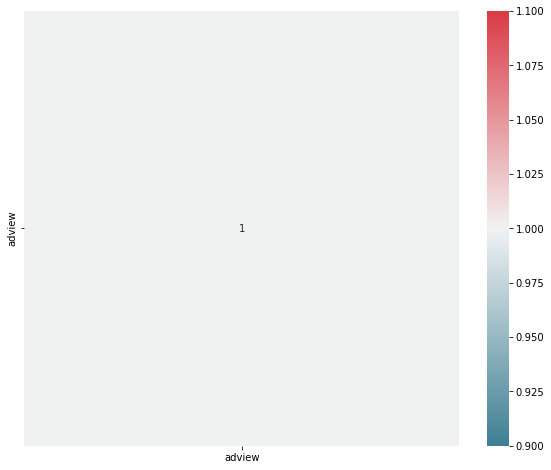

In [9]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [10]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [11]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [12]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [13]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [14]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9004,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [15]:
# Convert Time_in_sec for duration
import datetime
import time


In [16]:
def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
    if i not in P:
        mm+=i
    else:  
        if(i=="H"):
           h = mm
           mm = ''
        elif(i == "M"):
           m = mm
           mm = ''
        else:
           s = mm
           mm = ''
 if(h==''):
     h = '00'
 if(m == ''):
    m = '00'
 if(s==''):
    s='00'
 bp = h+':'+m+':'+s
 return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
 h, m, s = time_string.split(':')
 return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9004,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


In [17]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,1090,457,6
1,1707,56,2,6,64,570,4
2,2023,25,0,2,122,136,3
3,620860,777,161,153,2088,262,8
4,666,1,0,0,2233,31,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(11708, 7)

In [20]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [21]:
X_train.mean()

0.15357571865666558

In [22]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [23]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3493.3179717888047
Mean Squared Error: 838355049.0604033
Root Mean Squared Error: 28954.361485973117


In [24]:
linear_regression.predict(X_test)

array([[1774.05090978],
       [1440.0948975 ],
       [ 946.28182324],
       ...,
       [1546.81666666],
       [1252.44973363],
       [1731.84306118]])

In [25]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\S.Bisakha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3493.3179717888047
Mean Squared Error: 838355049.0604033
Root Mean Squared Error: 28954.361485973117


In [26]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 4606.003073770492
Mean Squared Error: 2895459118.1478825
Root Mean Squared Error: 53809.47052469372


In [27]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\SC1A7~1.BIS\AppData\Local\Temp/ipykernel_35652/3925127842.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3378.6111612175478
Mean Squared Error: 874506891.4218299
Root Mean Squared Error: 29572.062684598615


In [30]:
import keras

In [31]:
# Artificial Neural Network

from keras.layers.core import Dense

ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])




In [33]:
history=ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 0s 912us/step - loss: 764222720.0000 - mean_squared_error: 764222720.0000
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 764219968.0000 - mean_squared_error: 764219968.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 764215744.0000 - mean_squared_error: 764215744.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 764214784.0000 - mean_squared_error: 764214784.0000
Epoch 5/100
366/366 [==============================] - 1s 1ms/step - loss: 764213696.0000 - mean_squared_error: 764213696.0000
Epoch 6/100
366/366 [==============================] - 0s 941us/step - loss: 764206656.0000 - mean_squared_error: 764206656.0000
Epoch 7/100
366/366 [==============================] - 1s 1ms/step - loss: 764204288.0000 - mean_squared_error: 764204288.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 764200448.0000 - mean_squared_er

Epoch 65/100
366/366 [==============================] - 0s 1ms/step - loss: 764031872.0000 - mean_squared_error: 764031872.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 764030912.0000 - mean_squared_error: 764030912.0000
Epoch 67/100
366/366 [==============================] - 0s 1ms/step - loss: 764025600.0000 - mean_squared_error: 764025600.0000
Epoch 68/100
366/366 [==============================] - 1s 2ms/step - loss: 764023936.0000 - mean_squared_error: 764023936.0000
Epoch 69/100
366/366 [==============================] - 0s 1ms/step - loss: 764018368.0000 - mean_squared_error: 764018368.0000
Epoch 70/100
366/366 [==============================] - 1s 1ms/step - loss: 764018176.0000 - mean_squared_error: 764018176.0000
Epoch 71/100
366/366 [==============================] - 0s 1ms/step - loss: 764013632.0000 - mean_squared_error: 764013632.0000
Epoch 72/100
366/366 [==============================] - 0s 1ms/step - loss: 764009152.0000 - mean_square

In [34]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print_error(X_test,y_test,ann)

In [35]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")